# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|███████████████████████████████████████████████████████| 26.4M/26.4M [00:01<00:00, 14.5MB/s]
100%|████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|███████████████████████████████████████████████████████| 4.42M/4.42M [00:01<00:00, 4.29MB/s]
100%|███████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 9.64MB/s]


Here we can see one of the images.

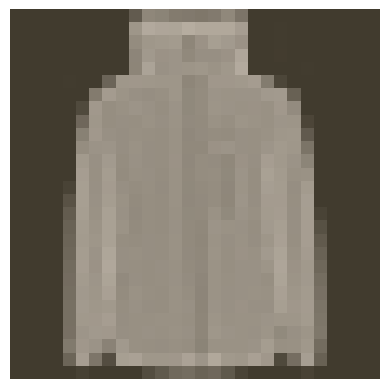

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [64]:
from torch import nn, optim

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.LogSoftmax(dim=1))

In [65]:
# TODO: Create the network, define the criterion and optimizer

criterion = nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [66]:
# TODO: Train the network here
for epoch in range(5):
    running_loss = 0
    for image, label in trainloader:
        image = image.view(image.shape[0],-1)

        # very important to have here otherwise it wont be able to track the gradients properly
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5425860986177092
Training loss: 0.45715213107910235
Training loss: 0.42840909155637724
Training loss: 0.41334214178261475
Training loss: 0.4126121007176096


In [67]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,10)

    def forward(self,x):

        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        return F.log_softmax(self.fc2(x), dim=1)

In [68]:
# TODO: Create the network, define the criterion and optimizer

model = Classifier()
criterion = nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [69]:
# TODO: Train the network here
for epoch in range(5):
    running_loss = 0
    for image, label in trainloader:
        image = image.view(image.shape[0],-1)

        # very important to have here otherwise it wont be able to track the gradients properly
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5414756626240226
Training loss: 0.4491126071701426
Training loss: 0.43297546488771055
Training loss: 0.4184113091338418
Training loss: 0.40600671395182863


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [61]:
# TODO: Create the network, define the criterion and optimizer

model = Classifier()
criterion = nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [62]:
# TODO: Train the network here
for epoch in range(5):
    running_loss = 0
    for image, label in trainloader:
        image = image.view(image.shape[0],-1)

        # very important to have here otherwise it wont be able to track the gradients properly
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.40964465566090685
Training loss: 0.40578280411549467
Training loss: 0.3991261534869417
Training loss: 0.3939606963889177
Training loss: 0.383661770998542


In [71]:
answers = {"0":"T-shirt/top",
"1":"Trouser",
"2":"Pullover",
"3":"Dress",
"4":"Coat",
"5":"Sandal",
"6":"Shirt",
"7":"Sneaker",
"8":"Bag",
"9":"Ankle boot"}

The correct answer is Sneaker


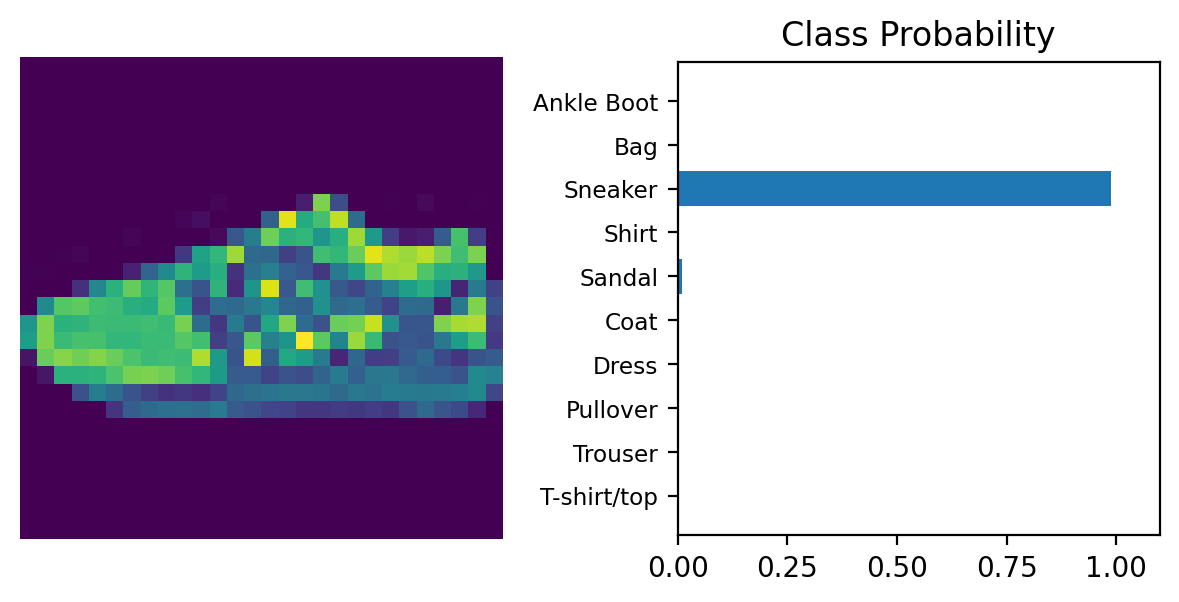

In [72]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
print(f"The correct answer is {answers[str(labels[0].item())]}")

img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

